In [1]:
# By Gavin Hartnett

#---------Notes/Issues---------
# 1) one of the frustrating things about Jupyter notebooks is that cells cannot be updated during an evaluation, i.e.
# the following will not print out in real time, it will only print out when the for loop is complete. This makes 
# monitoring the training performance harder when running in Jupyter notebooks. 

#for(i in 1:3){
#    Sys.sleep(1)
#    print(i)
#    }

# 2) I can't seem to change the working directory to the notebook directory, 
# so the paths to the MNIST data will need to be changed

In [2]:
# load necessary packages
rm(list = ls());
library(plyr);
library(repr)
options(repr.plot.width=5, repr.plot.height=4) #make the plots more resonably sized

In [3]:
# I found the following code useful for reading in the MNIST data, 
# taken from: https://gist.github.com/brendano/39760

#---------------------------------------------------------------------
# Load the MNIST digit recognition dataset into R
# http://yann.lecun.com/exdb/mnist/
# assume you have all 4 files and gunzip'd them
# creates train$n, train$x, train$y  and test$n, test$x, test$y
# e.g. train$x is a 60000 x 784 matrix, each row is one digit (28x28)
# call:  show_digit(train$x[5,])   to see a digit.
# brendan o'connor - gist.github.com/39760 - anyall.org

load_mnist <- function() {
  load_image_file <- function(filename) {
    ret = list()
    f = file(filename,'rb')
    readBin(f,'integer',n=1,size=4,endian='big')
    ret$n = readBin(f,'integer',n=1,size=4,endian='big')
    nrow = readBin(f,'integer',n=1,size=4,endian='big')
    ncol = readBin(f,'integer',n=1,size=4,endian='big')
    x = readBin(f,'integer',n=ret$n*nrow*ncol,size=1,signed=F)
    ret$x = matrix(x, ncol=nrow*ncol, byrow=T)
    close(f)
    ret
  }
  load_label_file <- function(filename) {
    f = file(filename,'rb')
    readBin(f,'integer',n=1,size=4,endian='big')
    n = readBin(f,'integer',n=1,size=4,endian='big')
    y = readBin(f,'integer',n=n,size=1,signed=F)
    close(f)
    y
  }
  train <<- load_image_file('/home/gavin/Dropbox/Data\ Science/MNIST/data/train-images.idx3-ubyte')
  test <<- load_image_file('/home/gavin/Dropbox/Data\ Science/MNIST/data/t10k-images.idx3-ubyte')
  
  train$y <<- load_label_file('/home/gavin/Dropbox/Data\ Science/MNIST/data/train-labels.idx1-ubyte')
  test$y <<- load_label_file('/home/gavin/Dropbox/Data\ Science/MNIST/data/t10k-labels.idx1-ubyte')  
}

show_digit <- function(arr784, col=gray(12:1/12), ...) {
  image(matrix(arr784, nrow=28)[,28:1], col=col, ...)
}

#---------------------------------------------------------------------
# actually load the data
load_mnist()

In [23]:
# here is an example of the data: it is a 784-length vector, corresponding to a square 28x28 pixel image
# the entries correspond to pixel intensity, ranging from 0 to 255
train$x[50001,]

# write this to file for the blog post
#write(train$x[50001,], file = "MNISTexample_numerical.txt", sep="\n")

[1]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 [19]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 [37]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 [55]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 [73]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 [91]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[109]   0   0   0   0   0   0   0   0   0   0   0   0   0   0  47 160 195 205
[127]  71  86  13   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[145]   0   0   0   0   0  12 238 254 254 254 254 254 227  84   0   0   0   0
[163]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13 196 176
[181] 127 176 207 236 245 222  23   0   0   0   0   0   0   0   0   0   0   0
[199]   0   0   0   0   0   0   0   0   0   0   0   0   0  20 137 254  95   0
[217]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[235]   0   0   0   0   0   0  78 254 144   0   0   0   0   0   0   0   0   0
[253]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  17 200 254
[271] 170   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[289]   0   0   0   0   0   0  47 218 254 216  29   0   0   0   0   0   0   0
[307]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  95 225 254
[325] 245  65   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[343]   0   0   0   0   0  12 128 252 254 236  40   0   0   0   0   0   0   0
[361]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 172 254 254
[379] 170  58   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[397]   0   0   0   0   0   0   0 207 254 254  65   0   0   0   0   0   0   0
[415]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 137
[433] 254 254 251 146  26   0   0   0   0   0   0   0   0   0   0   0   0   0
[451]   0   0   0   0   0   0   0   0   0   9 173 224 254 254 230  71   0   0
[469]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[487]   0   0   8  12 254 254 254 246 104   0   0   0   0   0   0   0   0   0
[505]   0   0   0   0   0   0   0   0   0   0   0   0   0   0  46 189 254 254
[523] 224   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[541]   0  10   0   0   0   0   0  17 175 254 254  25   0   0   0   0   0   0
[559]   0   0   0   0   0   0   0   0   0   0  35 231 156 112  87 186 191 218
[577] 254 254 219   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[595]   0   0 120 255 254 254 254 254 255 254 254 242  67   0   0   0   0   0
[613]   0   0   0   0   0   0   0   0   0   0   0   0 139 255 254 254 254 254
[631] 255 171  46  24   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[649]   0   0   0   0   5  71 164 189 174 174  66   4   0   0   0   0   0   0
[667]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[685]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[703]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[721]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[739]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[757]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[775]   0   0   0   0   0   0   0   0   0   0

[1] 3

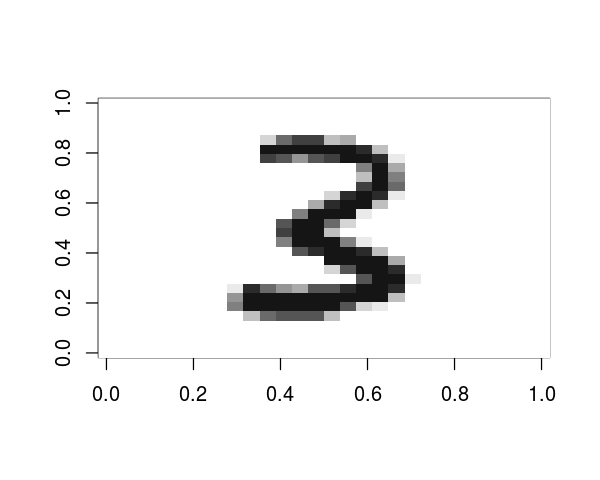

In [5]:
train$y[50001]

# save the image for the blog post I'm writing
#pdf("MNISTexample.pdf")
show_digit(train$x[50001,])
#dev.off()

In [6]:
# not all digits appear with equal frequency, but the frequencies aren't too different from each other
freq.df = as.data.frame(table(train$y))
freq.df

,Var1,Freq
1,0,5923
2,1,6742
3,2,5958
4,3,6131
5,4,5842
6,5,5421
7,6,5918
8,7,6265
9,8,5851
10,9,5949


In [7]:
# out of curiousity, how many digits can I correctly predict if I assume that there 
# is no relationship between the pixels and the digits (null hypothesis)?

# partition the unit interval into 10 bins with widths corresponding to the relative frequencies of the digits
set.seed(1)
nullprobs = freq.df$Freq/length(train$y)
nullbins = rep(0,11)
for (i in 1:9){
    nullbins[i+1] = nullbins[i] + nullprobs[i]
    }
nullbins[11] = 10

# same random numbers from the unit interval, the bin that the number falls into corresponds to the digit we will use
y.null = vector()
for(j in 1:length(train$y)){
    random = runif(1,0,1)
    for(i in 1:10){
        if( (nullbins[i] < random) & (random < nullbins[i+1])){
            y.null = c(y.null, i)
            }
        }
    }

# how well did we do?
#as.data.frame(table(y.null))
count.null = 0
for (i in 1:length(train$y)){
    if (train$y[i] == y.null[i]){
        count.null = count.null + 1
        }
    }
print(paste('null hypothesis error rate:', (1 - count.null/length(train$y))*100,'%'))

[1] "null hypothesis error rate: 90.9583333333333 %"


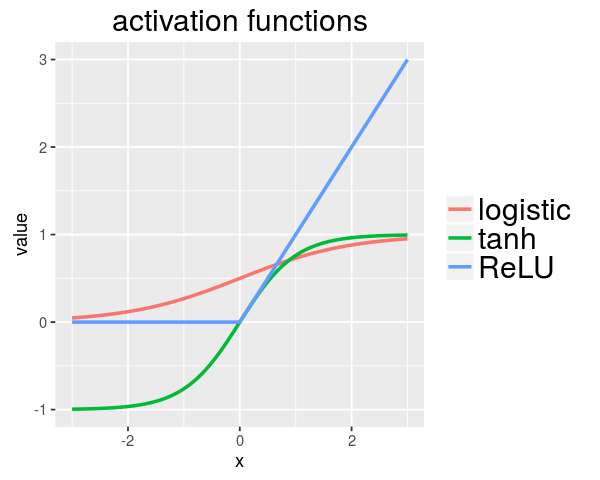

In [8]:
# some common activation functions
x = seq(from=-3, to=3, by=0.01)
library(ggplot2)
library(reshape2)

glogistic = function(x) {
    1.0/(1.0 + exp(-x))
    }
gtanh = function(x) {
    (exp(x) - exp(-x))/(exp(x) + exp(-x))
    }
gReLU = function(x) {
    sapply(x, function(x) max(0,x))
    }

# plot them
fits <- data.frame(x=x, logistic = glogistic(x), tanh = tanh(x), ReLU = gReLU(x))
long <- melt(fits, id.vars="x")
ggplot(data=long, aes(x=x, y=value, group=variable, colour=variable))+
  geom_line(size=1) +
  ggtitle("activation functions") +
  theme(plot.title = element_text(size = 18)) +
  theme(legend.title = element_blank()) +
  theme(legend.text = element_text(size = 18))
rm(x);
           
# let's use the logistic activation
g = function(x) {
    glogistic(x)
    }
# we'll need the derivative for back-propagation
gprime = function(x) {
    glogistic(x)*(1-glogistic(x))
    }

In [9]:
# fraction of training data to use for CV data
#--I don't think I'm training the networks long enough to see a benefit from a CV analysis, 
#--so I won't consider any regularization and just set the CV data set to be miniscule
CVfract = 0.001

# convert the training data to matrix form and add bias
x.train.big = matrix(1, nrow = length(train$x[1,]) + 1, ncol = length(train$x[,1]))
x.train.big[2:(length(train$x[1,])+1),] = t(train$x)[,]

# split a CV set off from the training set
set.seed(1)
idx = 1:length(train$x[,1])
idx.test = sample(idx, floor( (1-CVfract)*length(train$x[,1])))
x.train = x.train.big[,idx.test]
x.CV = x.train.big[,-idx.test]

# convert the test data to matrix form and add bias
x.test = matrix(1, nrow = length(test$x[1,]) + 1, ncol = length(test$x[,1]))
x.test[2:(length(test$x[1,])+1),] = t(test$x)[,]

In [10]:
# convert the training labels into vectors for the training set
y.train.big = matrix(0, nrow = length(train$x[,1]), ncol = 10)
for (i in 1:length(train$x[,1])){
        y.train.big[i,1+train$y[i]] = 1
}

# split off the CV set from the training set
y.train = y.train.big[idx.test,]
y.CV = y.train.big[-idx.test,]

# convert the training labels into vectors for the test set
y.test = matrix(0, nrow = length(test$x[,1]), ncol = 10)
for (i in 1:length(test$x[,1])){
        y.test[i,1+test$y[i]] = 1
}

In [11]:
# specify the architecture of the neural network
# we will choose nhlayers hidden layers
# layer n will have pn units
# remember to add a bias to each theta
p1 = length(train$x[1,]) # the first layer is fixed to fit the data
plast = 10 # the last layer is constrained by the number of classes
pvec = c(p1,300,100,plast) # number of units in a given layer
nhlayers = length(pvec) - 2 # number of hidden layers

# initialize the theta matrices
# a random initialization is preferred to avoid accidentally imposing a symmetry on the weights
# according to Coursera, a good range for the uniform spread is $r \in [ -\epsilon, + \epsilon]$, with 
# $epsilon = \sqrt{6}/\sqrt{p_i + p_{i+1}}$
set.seed(123)
Theta.init = list()
ThetaSum = 0
for (i in 1:(nhlayers+1)){
    epsilon = sqrt(6)/sqrt(pvec[i]+pvec[i+1])
    Theta.init[[i]] = matrix(runif(pvec[i+1]*(pvec[i] +1), -epsilon, epsilon), nrow = pvec[i+1], ncol = (pvec[i] +1)) 
    # check dimensions
    print(dim(Theta.init[[i]]))
    ThetaSum = ThetaSum + length(Theta.init[[i]])
    rm(epsilon)
}

print(paste('number of parameters:',ThetaSum))
print(paste('ratio of number of parameters to data points:',length(x.train)/ThetaSum))
rm(ThetaSum)

[1] 300 785
[1] 100 301
[1]  10 101
[1] "number of parameters: 266610"
[1] "ratio of number of parameters to data points: 176.485878249128"


In [12]:
# define functions I will use frequently in the optimization

# cost function
cost = function(y, h, lambda, Theta){
    # the unregulated cost
    cost.dummy = 0
    for (i in 1:length(y[,1])){
    cost.dummy = cost.dummy + sum(-y[i,]*log(h[,i]) - (1-y[i,])*log(1-h[,i]))
    }
    cost.dummy = cost.dummy/length(y[,1])
    
    # add the regularization term
    Theta_0 = Theta
    regterm = 0
    for (i in 1:(nhlayers+1)){
        Theta_0[[i]][,1] = 0
        regterm = regterm + sum(Theta_0[[i]] * Theta_0[[i]])
        }
    
    cost.dummy = cost.dummy + (lambda/(2*length(y[,1])))*regterm
    return(cost.dummy)
}

# percent error function
percenterror = function(y, h){
    count = 0
    for (i in 1:length(y[,1])){
    if (which.max(y[i,]) == which.max(h[,i])){
        count = count + 1
        }
    }
    return(100*(1-count/length(y[,1])))
}

# run through the network, feed-forward
feedforward = function(x, Theta){
    alist = list() #list of the a's, all but the last one are biased
    zlist = list() #list of the z's, omitting the last one
    alist[[1]] = x

    # run through the hidden layers
    for (i in 1:nhlayers){
        zlist[[i]] = Theta[[i]] %*% alist[[i]]
        alist[[i+1]] = g(zlist[[i]])
        alist[[i+1]] = rbind(1, alist[[i+1]])        
    }
    
    # last layer
    zlist[[nhlayers+1]] = Theta[[nhlayers+1]] %*% alist[[nhlayers+1]]
    alist[[nhlayers+2]] = glogistic(zlist[[nhlayers+1]])
    
    return(list("alist" = alist, "zlist" = zlist))
}

# back-propagation for gradient calculation
backprop = function(lambda, y, alist, zlist, Theta){
    delta = list()
    Delta = list()
    grad = list()
    zbiased = list()
    
    # strip off the bias elements for the regularization terms
    Theta_0 = Theta
    for (i in 1:(nhlayers+1)){
        Theta_0[[i]][,1] = 0
        }
        
    # compute the gradients using back-prop (i.e. the chain rule)
    delta[[nhlayers+2]] = alist[[nhlayers+2]] - t(y)
    Delta[[nhlayers+1]] = delta[[nhlayers+2]] %*% t(alist[[nhlayers+1]])    
    grad[[nhlayers+1]] = (1/length(y[,1])) * (Delta[[nhlayers+1]] + lambda * Theta_0[[nhlayers+1]]) 
    
    for (i in 0:(nhlayers-1)){
        zbiased[[i+1]] = matrix(1, nrow = nrow(zlist[[nhlayers-i]]) + 1, ncol = ncol(zlist[[nhlayers-i]]))
        zbiased[[i+1]][2:dim(zbiased[[i+1]])[1],] = zlist[[nhlayers-i]]
        
        delta[[nhlayers+1-i]] = (t( Theta[[nhlayers+1-i]]) %*% delta[[nhlayers+2-i]]) * gprime(zbiased[[i+1]])
        delta[[nhlayers+1-i]] = delta[[nhlayers+1-i]][2:dim(delta[[nhlayers+1-i]])[1],]
        Delta[[nhlayers-i]] = delta[[nhlayers+1-i]] %*% t(alist[[nhlayers-i]])
        grad[[nhlayers-i]] = (1/length(y[,1])) * (Delta[[nhlayers-i]] + lambda * Theta_0[[nhlayers-i]])
        }

    return(list("grad" = grad))
    }

# compute the gradient using finite differences (very slow)--can I make this faster?
gradFD = function(epsilon, lambda, Theta, x, y){
    grad = list()
    for (k in 1:(nhlayers+1)){
        grad[[k]] = 0*Theta[[k]]
        
        for (i in 1:dim(Theta[[k]])[1]){
            for (j in 1:dim(Theta[[k]])[2]){
                
                Thetaplus = Theta
                Thetaminus = Theta            
                Thetaplus[[k]][i,j] = (Theta[[k]][i,j] + epsilon)
                Thetaminus[[k]][i,j] = (Theta[[k]][i,j] - epsilon) 
            
                FF.plus = feedforward(x.train, Thetaplus)
                alist.plus = FF.plus$alist
                FF.minus = feedforward(x.train, Thetaminus)
                alist.minus = FF.minus$alist
                
                costplus = cost(y.train, alist.plus[[nhlayers+2]], lambda, Thetaplus)
                costminus = cost(y.train, alist.minus[[nhlayers+2]], lambda, Thetaminus)
                
                grad[[k]][i,j] = (costplus - costminus)/(2*epsilon)
                }
            }
        }
        
    return(list("grad" = grad))
    }

# it'd be nice to have a function that can tell me if a vector is monotonically decreasing
monotonic_decQ = function(vec) {
    out = logical()
    for (i in 1:(length(vec)-1)) {
        if (vec[i+1] < vec[i]) {
            out = c(out, TRUE)
        }
        else {
            out = c(out, FALSE)
        }
    }
    return(all(out))
}

In [13]:
# run through the network to see what the initial costs and error rates are

# I should expect to do a little worse than 90% since there are 10 digits and they are not quite 
# uniformly distributed. I should also do worse than naive Bayes which was 90.96% I've found that sometimes 
# this is the case, somtimes it's not, I presume the randomness in the Theta's is to blame; the above may 
# only hold some reasonable fraction of the time
FF = feedforward(x.train, Theta.init)
zlist = FF$zlist
alist = FF$alist
print(paste('initial cost',cost(y.train, alist[[nhlayers+2]], 0, Theta.init)))
print(paste('initial error',percenterror(y.train, alist[[nhlayers+2]]),'%'))
rm(FF,zlist,alist)

[1] "initial cost 6.63226061080365"
[1] "initial error 89.0006673340007 %"


In [14]:
# gradient check
# for different values of epsilon different gradients can be swamped by round-off error, so be careful
# if I make the FD calculation faster I could implement this periodically as a check, 
# for now I can only use it for super small networks

gradcheckflag = FALSE

if (gradcheckflag) {
    FF = feedforward(x.train, Theta.init)
    zlist = FF$zlist
    alist = FF$alist
    gradBP = backprop(0, y.train, alist, zlist, Theta.init)$grad
    gradFDa = gradFD(2e-3, 0, Theta.init, x.train, y.train)$grad
    gradFDb = gradFD(1e-3, 0, Theta.init, x.train, y.train)$grad

    for (i in 1:(nhlayers+1)){
        print( max(gradBP[[i]]-gradFDa[[i]])/max(gradBP[[i]]-gradFDb[[i]]) )
    }
    rm(FF, zlist, alist, gradBP, gradFDa, gradFDb)
    }

In [15]:
# initialize some variables and lists for the training step
jmax = 600 # max number of iterations
numitdiag = 5 # run diagnostics every X iterations
# regularization parameters
lambdalist = 0
print(lambdalist)

finalThetalist = list()
cost.history.train.final = list()
conv.history.train.final = list()
cost.history.CV.final = list()

[1] 0


In [16]:
for (k in 1:length(lambdalist)){
    # initial learning rate
    alpha = 1
    lambda = lambdalist[k]
    # for every choice of lambda, start with the same initial theta matrices
    Theta = Theta.init

    cond = TRUE
    j = 1
    while (cond){
        # run through the network, feed-forward
        FF = feedforward(x.train, Theta)
        zlist = FF$zlist
        alist = FF$alist
            
        # back-propagate to find the gradients
        gradBP = backprop(lambda, y.train, alist, zlist, Theta)$grad
               
        # update the theta's
        for (i in 1:(nhlayers+1)){
            Theta[[i]] = Theta[[i]] - alpha*gradBP[[i]]
            }
        
        #--------------------------------
        # diagnostic calculations: do these only once every numitdiag iterations
        if (j %% numitdiag == 1) {
            
            # calculate the training and CV cost
            FF.CV = feedforward(x.CV, Theta)
            alist.CV = FF.CV$alist          
            
            if (j == 1) {
                cost.history.train = cost(y.train, alist[[nhlayers+2]], lambda, Theta)
                cost.history.CV = cost(y.CV, alist.CV[[nhlayers+2]], 0, Theta) #remember to not use regulated term in CV cost
                percenterror.history.train = percenterror(y.train, alist[[nhlayers+2]])
                percenterror.history.CV = percenterror(y.CV, alist.CV[[nhlayers+2]])
                } else {
                cost.history.train = c(cost.history.train, cost(y.train, alist[[nhlayers+2]], lambda, Theta))
                cost.history.CV = c(cost.history.CV, cost(y.CV, alist.CV[[nhlayers+2]], 0, Theta))
                percenterror.history.train = c(percenterror.history.train, percenterror(y.train, alist[[nhlayers+2]]))
                percenterror.history.CV = c(percenterror.history.CV, percenterror(y.CV, alist.CV[[nhlayers+2]]))
                }
            rm(FF.CV, alist.CV)
            
            # terminate the optimization when the convergence rate is small enough or when jmax has been reached
            # first calculate the convergence rate
            if (j > 1) {
                convrate = abs(2*(cost.history.train[length(cost.history.train)] - cost.history.train[length(cost.history.train)-1])
                       /(cost.history.train[length(cost.history.train)] + cost.history.train[length(cost.history.train)-1]))
                
                if (floor(j / numitdiag) == 1) {
                conv.history.train = convrate
                    } else {
                    conv.history.train = c(conv.history.train, convrate)
                    }
               
                # if the cost has increased, decay the learning rate
                if (j %% 500 == 1 | cost.history.train[length(cost.history.train)] > cost.history.train[length(cost.history.train)-1]){
                    alpha = 0.9*alpha
                    }
                
                # print out updates (do not do this in Jupyter notebooks for the reason noted at the top of this file)
                #par(mfrow=c(2,1))
                #plot(cost.history.train)
                #plot(conv.history.train)
                #print(paste('k = ', k,', j = ',j,', alpha = ',alpha, ', cost = ',cost.history.train[length(cost.history.train)]))
                #print(paste('conv = ' ,convrate, 'percent error = ', percenterror.history.train[length(percenterror.history.train)]))
                #FF.CV = feedforward(x.CV, Theta)
                #alist.CV = FF.CV$alist
                #print(paste('CV error rate:', percenterror(y.CV, alist.CV[[nhlayers+2]]),'%'))
                #rm(FF.CV, alist.CV)
                
                # terminate the run
                if (j >= jmax) {
                    # save the theta matrices and final costs
                    finalThetalist[[k]] = Theta
                    cost.history.train.final[[k]] = cost.history.train
                    cost.history.CV.final[[k]] = cost.history.CV
                    conv.history.train.final[[k]] = conv.history.train
                    # terminate the while loop
                    cond = FALSE
                    }    
                }
            }
        #--------------------------------

        # clear the variables
        rm(FF, alist, zlist, gradBP)

        # increment the while loop counter
        j = j + 1
        
        }
    }


In [ ]:
# perform a CV analysis 
#cost.history.train.final.last = numeric()
#cost.history.CV.final.last = numeric()
#for (i in 1:(length(lambdalist)-2)){
#  cost.history.train.final.last = c(cost.history.train.final.last, cost.history.train.final[[i]][length(cost.history.train.final[[i]])])
#  cost.history.CV.final.last = c(cost.history.CV.final.last, cost.history.CV.final[[i]][length(cost.history.CV.final[[i]])])
#  }
#newlambdalist = lambdalist[1:10]
#par(mfrow=c(1,1))
#plot(newlambdalist, cost.history.train.final.last, col="black", xlim=c(lambdalist[1], lambdalist[length(lambdalist)]), ylim=c(0.3, 0.6))
#points(newlambdalist, cost.history.CV.final.last, col="red")
#cost.history.train.final.last

In [17]:
# analyze the performance
k=1
FF.train = feedforward(x.train, finalThetalist[[k]])
alist.train = FF.train$alist
FF.CV = feedforward(x.CV, finalThetalist[[k]])
alist.CV = FF.CV$alist
FF.test = feedforward(x.test, finalThetalist[[k]])
alist.test = FF.test$alist

# percent error rate
print(paste('training error rate:', percenterror(y.train, alist.train[[nhlayers+2]]),'%'))
print(paste('CV error rate:', percenterror(y.CV, alist.CV[[nhlayers+2]]),'%'))
print(paste('test error rate:', percenterror(y.test, alist.test[[nhlayers+2]]),'%'))
cat('\n')
# cost function
print(paste('(regularized) training cost:', cost(y.train, alist.train[[nhlayers+2]], lambda, finalThetalist[[k]])))
print(paste('CV cost:', cost(y.CV, alist.CV[[nhlayers+2]], 0, finalThetalist[[k]])))
print(paste('test cost:', cost(y.test, alist.test[[nhlayers+2]], 0, finalThetalist[[k]])))

rm(FF.train, alist.train, FF.CV, alist.CV, FF.test, alist.test)

[1] "training error rate: 3.96062729396063 %"
[1] "CV error rate: 5 %"
[1] "test error rate: 5.98999999999999 %"

[1] "(regularized) training cost: 0.295754977749626"
[1] "CV cost: 0.301237048732287"
[1] "test cost: 0.385635305059981"
